In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug_classification.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
df['Drug_Type'] = df['Drug_Type'].str.upper()

X = df.drop('Drug_Type', axis=1)
y = df['Drug_Type']
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,0,2,1,25.355,DRUGY
1,47,1,0,1,13.093,DRUGC
2,47,1,0,1,10.114,DRUGC
3,28,0,1,1,7.798,DRUGX
4,61,0,0,1,18.043,DRUGY


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 4]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 4], 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [6]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


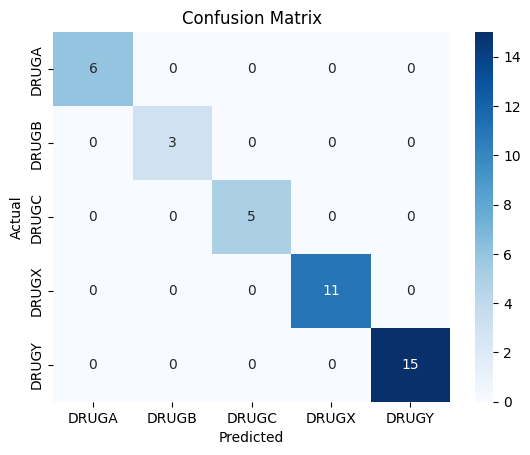

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       DRUGA       1.00      1.00      1.00         6
       DRUGB       1.00      1.00      1.00         3
       DRUGC       1.00      1.00      1.00         5
       DRUGX       1.00      1.00      1.00        11
       DRUGY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



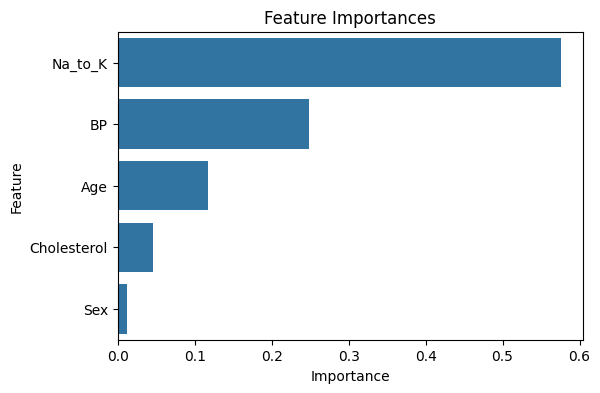

In [9]:
importances = best_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [10]:
least_important = feat_imp.idxmin()
X_train_dropped = X_train.drop(least_important, axis=1)
X_test_dropped = X_test.drop(least_important, axis=1)

best_model.fit(X_train_dropped, y_train)
y_pred_dropped = best_model.predict(X_test_dropped)

print("\nClassification Report after dropping least important feature:")
print(classification_report(y_test, y_pred_dropped))


Classification Report after dropping least important feature:
              precision    recall  f1-score   support

       DRUGA       1.00      1.00      1.00         6
       DRUGB       1.00      1.00      1.00         3
       DRUGC       1.00      1.00      1.00         5
       DRUGX       1.00      1.00      1.00        11
       DRUGY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

